# Computer Vision - CNNs for Image Classification

## Dataset: CIFAR10 | Framework: Keras (Tensorflow)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import clone_model, Model
from sklearn.model_selection import train_test_split
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
cifar10 = tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [ ]:
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print(f"Traning set labels: {y_train.shape}")
print(f"Test set labels: {y_test.shape}")

Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Traning set labels: (50000, 1)
Test set labels: (10000, 1)


In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

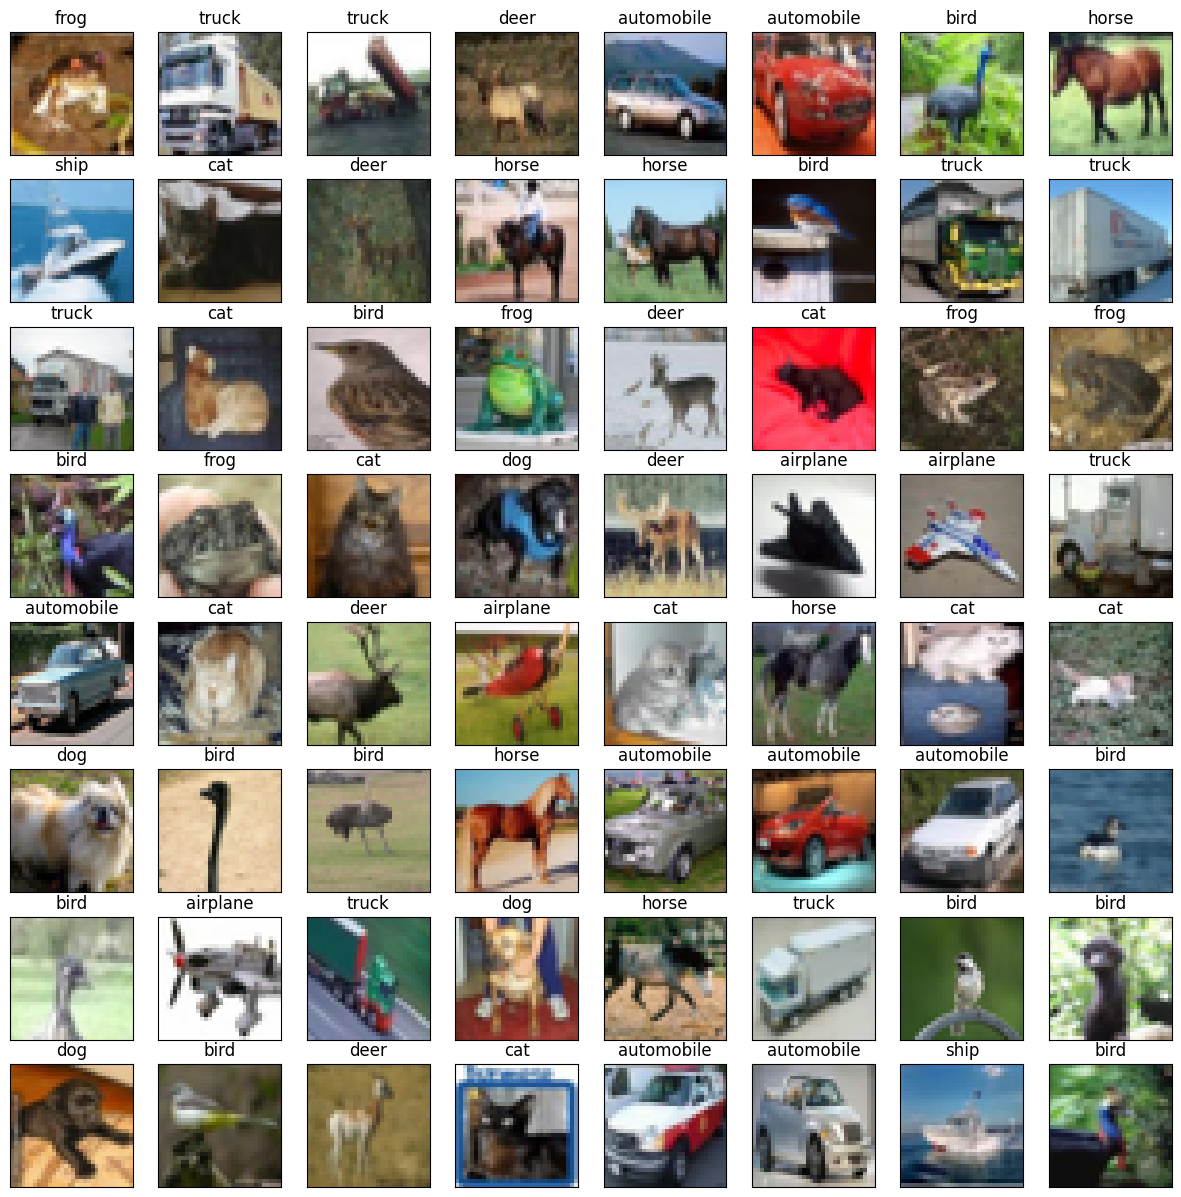

In [ ]:
plt.figure(figsize=(15,15))

for i in range(64):
    plt.subplot(8, 8, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)

    plt.imshow(X_train[i])

    plt.title(class_names[y_train[i][0]], fontsize=12)

plt.show()

In [ ]:
# what is an image?
X_train[0][0][0]

array([59, 62, 63], dtype=uint8)

In [ ]:
np.max(X_train), np.min(X_train)

(np.uint8(255), np.uint8(0))

In [ ]:
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
unique, counts = np.unique(y_train, return_counts=True)

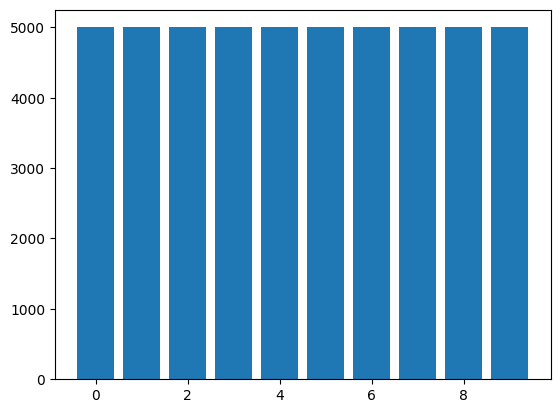

In [ ]:
plt.bar(unique, counts)
plt.show()

## 1. MLP for Image Classification

In [ ]:
mlp_model = models.Sequential(name="MLP_model")

mlp_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
mlp_model.add(layers.Flatten())
mlp_model.add(layers.Dense(512, activation='relu'))
mlp_model.add(layers.Dense(256, activation='relu'))
mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)

mlp_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

mlp_model.summary()

Model: "MLP_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,738,890 (6.63 MB)

 Trainable params: 1,738,890 (6.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mlp_history = mlp_model.fit(X_train,
                            y_train,
                            epochs=50,
                            batch_size=256,
                            validation_split=0.1
                            )

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2278 - loss: 2.1275 - val_accuracy: 0.3494 - val_loss: 1.8149
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3711 - loss: 1.7679 - val_accuracy: 0.3888 - val_loss: 1.7114
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4063 - loss: 1.6579 - val_accuracy: 0.4202 - val_loss: 1.6239
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4305 - loss: 1.5950 - val_accuracy: 0.4398 - val_loss: 1.5958
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4445 - loss: 1.5537 - val_accuracy: 0.4530 - val_loss: 1.5423
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4693 - loss: 1.4889 - val_accuracy: 0.4660 - val_loss: 1.5195
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4802 - loss: 1.4573 - val_accuracy: 0.4712 - val_loss: 1.4989
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4891 - loss: 1.4232 - val_accuracy: 0

In [ ]:
test_loss, test_accuracy = mlp_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5092 - loss: 1.8521
Test Loss: 1.8575400114059448
Test Accuracy: 0.5134999752044678


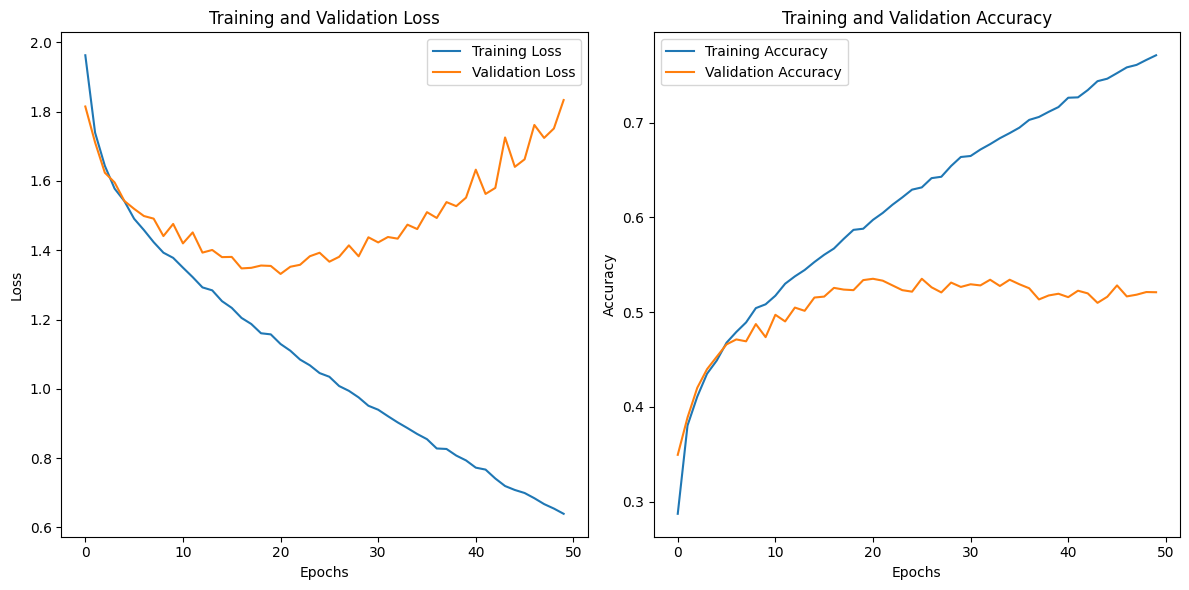

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(mlp_history.history['loss'], label='Training Loss')
plt.plot(mlp_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(mlp_history.history['accuracy'], label='Training Accuracy')
plt.plot(mlp_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
predictions_mlp = mlp_model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
predicted_labels_mlp = np.argmax(predictions_mlp, axis=1)

In [ ]:
# what are the predictions?
predictions_mlp[0]

array([1.1203188e-04, 1.2201535e-03, 5.8602059e-04, 3.5049535e-02,
       9.5899826e-01, 3.5337035e-03, 5.3829865e-07, 1.4526089e-05,
       2.8396866e-04, 2.0135278e-04], dtype=float32)

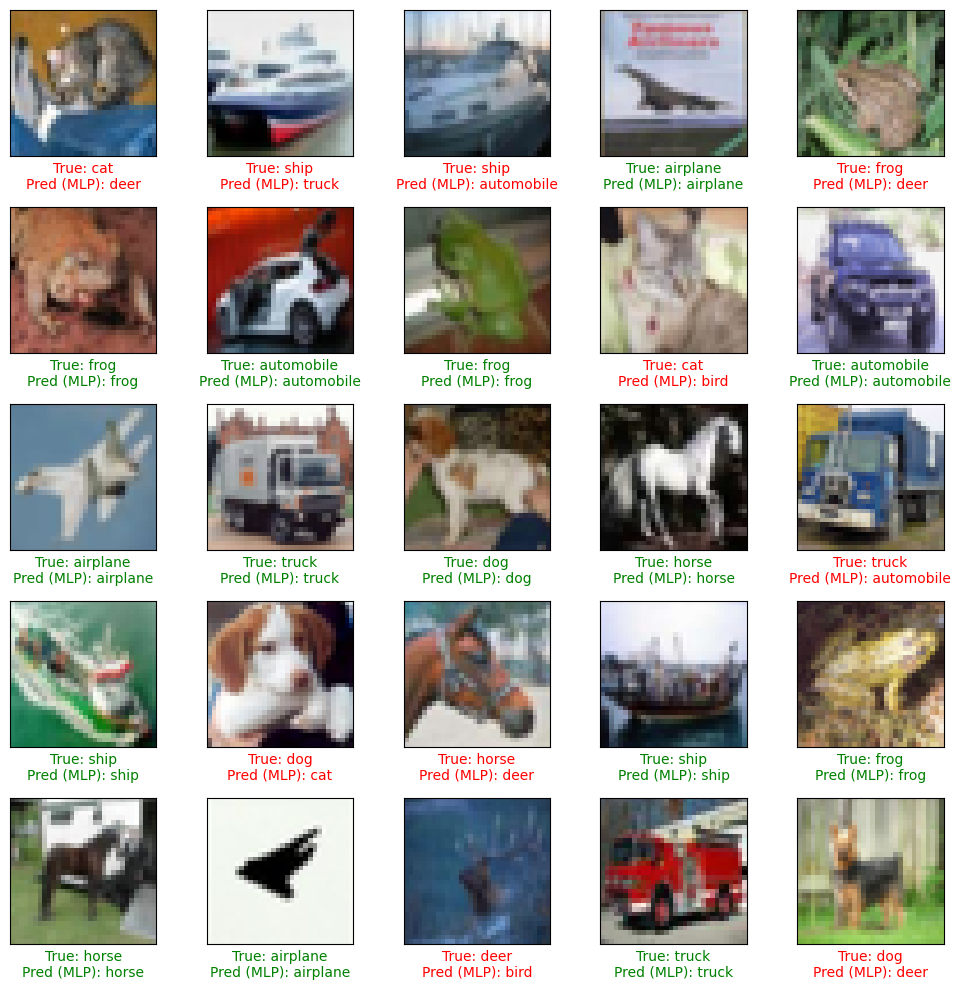

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label_mlp = class_names[predicted_labels_mlp[i]]
    if true_label == predicted_label_mlp:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (MLP): {predicted_label_mlp}", color=color)
plt.tight_layout()
plt.show()

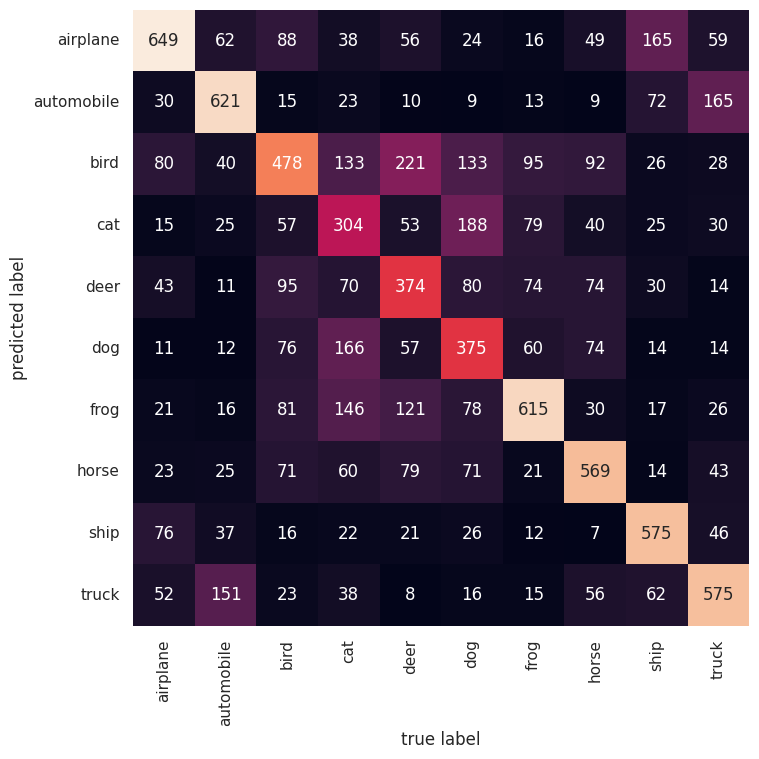

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

mat = confusion_matrix(y_test, predicted_labels_mlp)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [ ]:
print(classification_report(y_test, predicted_labels_mlp, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.54      0.65      0.59      1000
  automobile       0.64      0.62      0.63      1000
        bird       0.36      0.48      0.41      1000
         cat       0.37      0.30      0.33      1000
        deer       0.43      0.37      0.40      1000
         dog       0.44      0.38      0.40      1000
        frog       0.53      0.61      0.57      1000
       horse       0.58      0.57      0.58      1000
        ship       0.69      0.57      0.63      1000
       truck       0.58      0.57      0.58      1000

    accuracy                           0.51     10000
   macro avg       0.52      0.51      0.51     10000
weighted avg       0.52      0.51      0.51     10000



## 2. CNN for Image Classification

In [ ]:
cnn_model = models.Sequential(name="CNN_model")

cnn_model.add(layers.InputLayer(input_shape=(32, 32, 3)))
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

cnn_model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 582,026 (2.22 MB)

 Trainable params: 582,026 (2.22 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cnn_history = cnn_model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=256,
                    validation_split=0.1)

Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.2370 - loss: 2.0439 - val_accuracy: 0.4890 - val_loss: 1.4219
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.4582 - loss: 1.4989 - val_accuracy: 0.5834 - val_loss: 1.2120
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.5279 - loss: 1.3179 - val_accuracy: 0.6080 - val_loss: 1.1074
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.5665 - loss: 1.2176 - val_accuracy: 0.6464 - val_loss: 1.0262
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 19ms/step - accuracy: 0.5925 - loss: 1.1341 - val_accuracy: 0.6704 - val_loss: 0.9353
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6191 - loss: 1.0700 - val_accuracy: 0.6890 - val_loss: 0.9027
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 5s 20ms/step - accuracy: 0.6438 - loss: 1.0199 - val_accuracy: 0.7064 - val_loss: 0.8578
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.6530 - loss: 0.9956 - val_acc

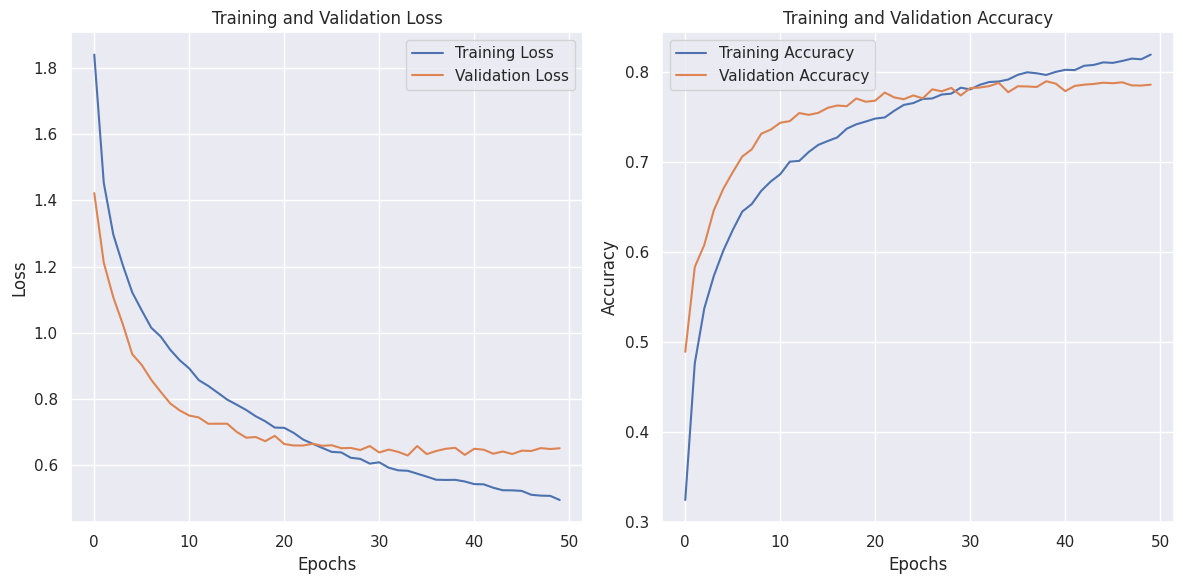

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['accuracy'], label='Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.7892 - loss: 0.6453
Test Loss: 0.6644390821456909
Test Accuracy: 0.7853000164031982


In [ ]:
# Get predictions for the test set
predictions_cnn = cnn_model.predict(X_test)
predicted_labels_cnn = np.argmax(predictions_cnn, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


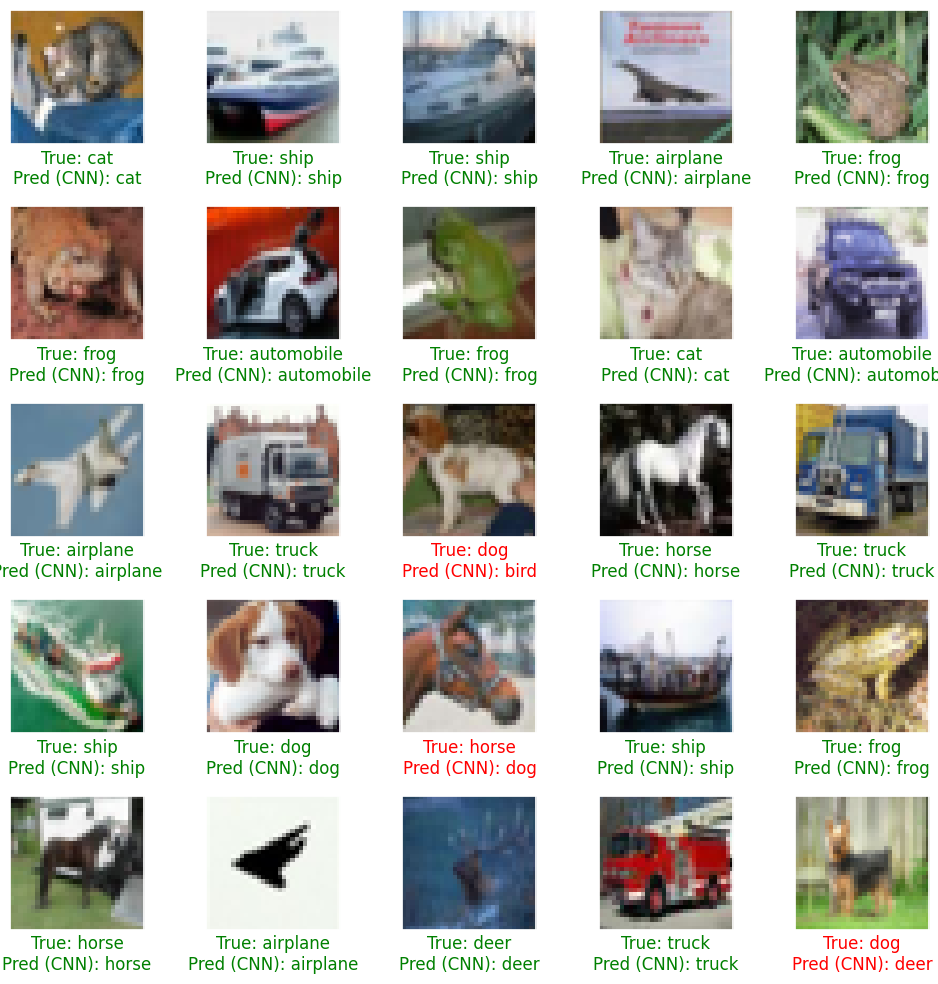

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i])
    true_label = class_names[y_test[i][0]]
    predicted_label = class_names[predicted_labels_cnn[i]]
    if true_label == predicted_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel(f"True: {true_label}\nPred (CNN): {predicted_label}", color=color)
plt.tight_layout()
plt.show()

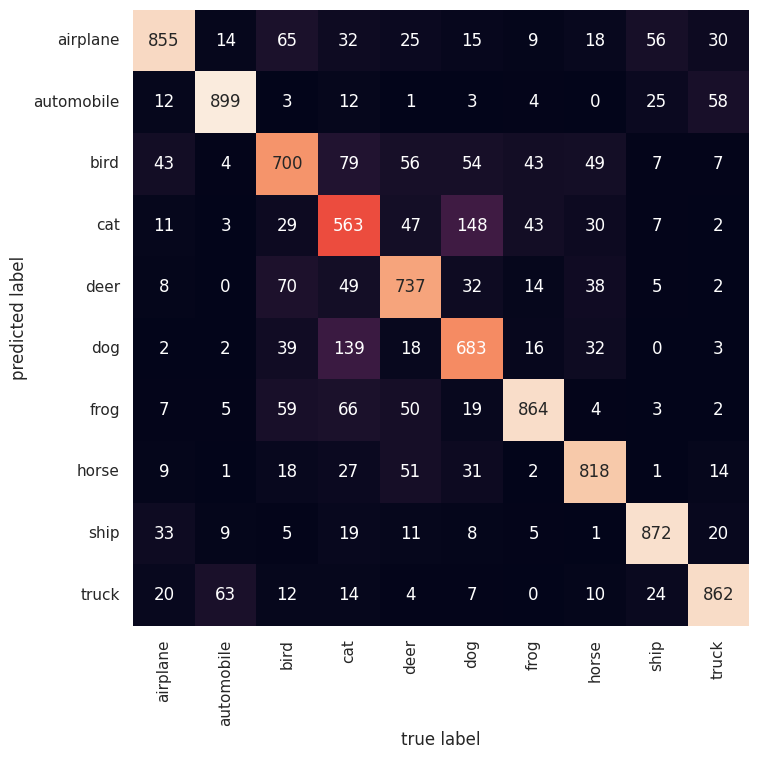

In [ ]:
mat = confusion_matrix(y_test, predicted_labels_cnn)
plt.figure(figsize=(8, 8)); sns.set()
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('true label'); plt.ylabel('predicted label'); plt.show()

In [ ]:
print(classification_report(y_test, predicted_labels_cnn, target_names=class_names))

              precision    recall  f1-score   support

    airplane       0.76      0.85      0.81      1000
  automobile       0.88      0.90      0.89      1000
        bird       0.67      0.70      0.69      1000
         cat       0.64      0.56      0.60      1000
        deer       0.77      0.74      0.75      1000
         dog       0.73      0.68      0.71      1000
        frog       0.80      0.86      0.83      1000
       horse       0.84      0.82      0.83      1000
        ship       0.89      0.87      0.88      1000
       truck       0.85      0.86      0.86      1000

    accuracy                           0.79     10000
   macro avg       0.78      0.79      0.78     10000
weighted avg       0.78      0.79      0.78     10000



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "CNN_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       524,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 583,178 (2.22 MB)

 Trainable params: 582,602 (2.22 MB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.3635 - loss: 1.9726

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 48ms/step - accuracy: 0.3636 - loss: 1.9722 - val_accuracy: 0.5511 - val_loss: 1.2704 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5573 - loss: 1.2381

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.5573 - loss: 1.2381 - val_accuracy: 0.5866 - val_loss: 1.1960 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6081 - loss: 1.1092 - val_accuracy: 0.5753 - val_loss: 1.2226 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6314 - loss: 1.0437

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6314 - loss: 1.0437 - val_accuracy: 0.6612 - val_loss: 0.9965 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6558 - loss: 0.9787

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6558 - loss: 0.9787 - val_accuracy: 0.6690 - val_loss: 0.9672 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.6713 - loss: 0.9466

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6713 - loss: 0.9466 - val_accuracy: 0.6934 - val_loss: 0.8669 - learning_rate: 0.0010
Epoch 7/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6866 - loss: 0.8982

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.6866 - loss: 0.8982 - val_accuracy: 0.7139 - val_loss: 0.8134 - learning_rate: 0.0010
Epoch 8/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.6905 - loss: 0.8870

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.6905 - loss: 0.8869 - val_accuracy: 0.7205 - val_loss: 0.7997 - learning_rate: 0.0010
Epoch 9/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7016 - loss: 0.8613 - val_accuracy: 0.7184 - val_loss: 0.8065 - learning_rate: 0.0010
Epoch 10/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7074 - loss: 0.8423 - val_accuracy: 0.6892 - val_loss: 0.9075 - learning_rate: 0.0010
Epoch 11/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7160 - loss: 0.8250 - val_accuracy: 0.7111 - val_loss: 0.8433 - learning_rate: 0.0010
Epoch 12/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7239 - loss: 0.8028

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7239 - loss: 0.8027 - val_accuracy: 0.7540 - val_loss: 0.7013 - learning_rate: 5.0000e-04
Epoch 13/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7352 - loss: 0.7682

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7352 - loss: 0.7682 - val_accuracy: 0.7625 - val_loss: 0.6993 - learning_rate: 5.0000e-04
Epoch 14/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7374 - loss: 0.7566 - val_accuracy: 0.7386 - val_loss: 0.7727 - learning_rate: 5.0000e-04
Epoch 15/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7411 - loss: 0.7463 - val_accuracy: 0.7517 - val_loss: 0.7273 - learning_rate: 5.0000e-04
Epoch 16/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7390 - loss: 0.7471 - val_accuracy: 0.7511 - val_loss: 0.7259 - learning_rate: 5.0000e-04
Epoch 17/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7514 - loss: 0.7157

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7514 - loss: 0.7158 - val_accuracy: 0.7635 - val_loss: 0.6811 - learning_rate: 2.5000e-04
Epoch 18/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7554 - loss: 0.7018

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7554 - loss: 0.7018 - val_accuracy: 0.7726 - val_loss: 0.6681 - learning_rate: 2.5000e-04
Epoch 19/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7620 - loss: 0.6929 - val_accuracy: 0.7691 - val_loss: 0.6690 - learning_rate: 2.5000e-04
Epoch 20/50
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7548 - loss: 0.7043

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7548 - loss: 0.7043 - val_accuracy: 0.7765 - val_loss: 0.6417 - learning_rate: 2.5000e-04
Epoch 21/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7569 - loss: 0.6994 - val_accuracy: 0.7723 - val_loss: 0.6627 - learning_rate: 2.5000e-04
Epoch 22/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7584 - loss: 0.6929 - val_accuracy: 0.7745 - val_loss: 0.6487 - learning_rate: 2.5000e-04
Epoch 23/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7601 - loss: 0.6942 - val_accuracy: 0.7719 - val_loss: 0.6668 - learning_rate: 2.5000e-04
Epoch 24/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7639 - loss: 0.6777 - val_accuracy: 0.7741 - val_loss: 0.6534 - learning_rate: 1.2500e-04
Epoch 25/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7677 - loss: 0.6661 - val_accuracy: 0.7671 - val_loss: 0.6845 - learning_rate: 1.2500e-04
Epoch 26/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - a

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7711 - loss: 0.6661 - val_accuracy: 0.7822 - val_loss: 0.6340 - learning_rate: 6.2500e-05
Epoch 28/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7729 - loss: 0.6532

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7729 - loss: 0.6532 - val_accuracy: 0.7829 - val_loss: 0.6306 - learning_rate: 6.2500e-05
Epoch 29/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7704 - loss: 0.6592 - val_accuracy: 0.7750 - val_loss: 0.6544 - learning_rate: 6.2500e-05
Epoch 30/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7742 - loss: 0.6601 - val_accuracy: 0.7811 - val_loss: 0.6410 - learning_rate: 6.2500e-05
Epoch 31/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7739 - loss: 0.6570 - val_accuracy: 0.7839 - val_loss: 0.6330 - learning_rate: 6.2500e-05
Epoch 32/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7726 - loss: 0.6563 - val_accuracy: 0.7829 - val_loss: 0.6369 - learning_rate: 3.1250e-05
Epoch 33/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7736 - loss: 0.6599 - val_accuracy: 0.7806 - val_loss: 0.6376 - learning_rate: 3.1250e-05
Epoch 34/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - a

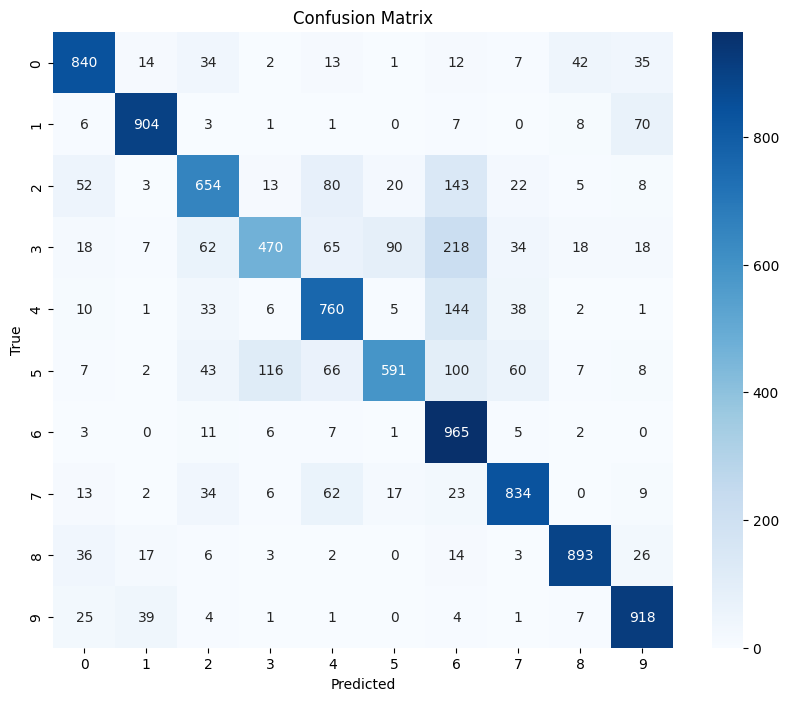

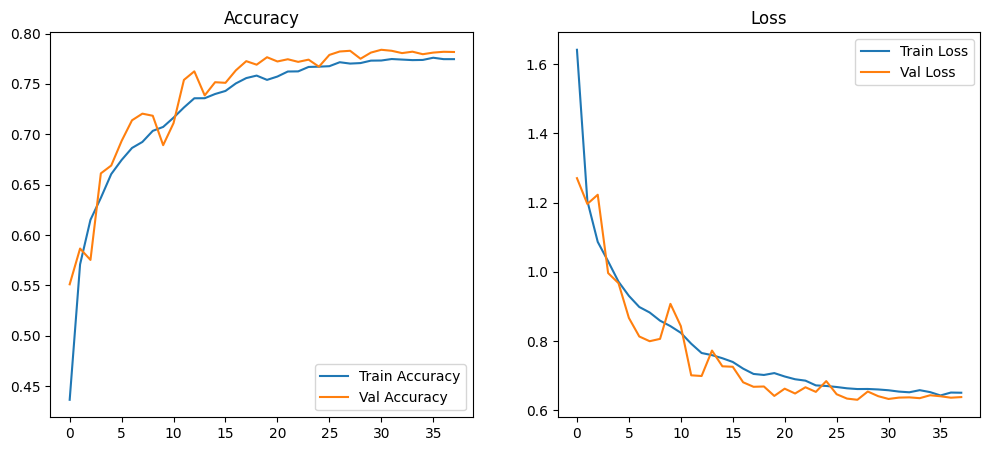

In [ ]:
# Improved CNN Model

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()

# Image Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# CNN Model Definition
cnn_model = models.Sequential(name="CNN_model")

cnn_model.add(layers.InputLayer(input_shape=(32, 32, 3)))

cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())

cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())

cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())

cnn_model.add(layers.Dense(128, activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))

cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile Model
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Summary
cnn_model.summary()

# Callbacks
callbacks = [
    EarlyStopping(patience=10, restore_best_weights=True),
    ModelCheckpoint('best_model.h5', save_best_only=True),
    ReduceLROnPlateau(factor=0.5, patience=3, min_lr=1e-5)
]

# Train
history = cnn_model.fit(datagen.flow(x_train, y_train, batch_size=64),
                        epochs=50,
                        validation_data=(x_test, y_test),
                        callbacks=callbacks)

# Evaluate
test_loss, test_acc = cnn_model.evaluate(x_test, y_test)
print(f"\n✅ Final Test Accuracy: {test_acc:.2%}")

# Classification report
y_pred = np.argmax(cnn_model.predict(x_test), axis=1)
print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Accuracy/Loss Plot
def plot_curves(history):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss')
    plt.legend()

    plt.show()

plot_curves(history)


In [ ]:
cnn_model = models.Sequential(name="CNN_model")
cnn_model.add(layers.InputLayer(input_shape=(32, 32, 3)))

# Block 1
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

# ✅ New Block 2
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

# Dense layers
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))


optimizer = SGD(learning_rate=0.05, momentum=0.9, nesterov=True)
cnn_model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])




Epoch 1/150


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - accuracy: 0.2840 - loss: 3.0542

782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 50ms/step - accuracy: 0.2841 - loss: 3.0530 - val_accuracy: 0.4731 - val_loss: 1.8109 - learning_rate: 0.0500
Epoch 2/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.4422 - loss: 1.8471

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.4423 - loss: 1.8470 - val_accuracy: 0.5699 - val_loss: 1.4414 - learning_rate: 0.0500
Epoch 3/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.4974 - loss: 1.6698 - val_accuracy: 0.5290 - val_loss: 1.6219 - learning_rate: 0.0500
Epoch 4/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5323 - loss: 1.6031 - val_accuracy: 0.5842 - val_loss: 1.5089 - learning_rate: 0.0500
Epoch 5/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 44ms/step - accuracy: 0.5514 - loss: 1.5779 - val_accuracy: 0.5999 - val_loss: 1.4885 - learning_rate: 0.0500
Epoch 6/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.5706 - loss: 1.5572 - val_accuracy: 0.6009 - val_loss: 1.5240 - learning_rate: 0.0500
Epoch 7/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.5859 - loss: 1.5354 - val_accuracy: 0.6208 - val_loss: 1.4685 - learning_rate: 0.0500
Epoch 8/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.5939 - loss: 1

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.5939 - loss: 1.5295 - val_accuracy: 0.6537 - val_loss: 1.3991 - learning_rate: 0.0500
Epoch 9/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6047 - loss: 1.5276 - val_accuracy: 0.5996 - val_loss: 1.6437 - learning_rate: 0.0500
Epoch 10/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.6093 - loss: 1.5179 - val_accuracy: 0.6340 - val_loss: 1.4983 - learning_rate: 0.0500
Epoch 11/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6162 - loss: 1.5218 - val_accuracy: 0.6495 - val_loss: 1.4436 - learning_rate: 0.0500
Epoch 12/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6204 - loss: 1.5131 - val_accuracy: 0.6599 - val_loss: 1.4081 - learning_rate: 0.0500
Epoch 13/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.6283 - loss: 1.4942

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.6283 - loss: 1.4942 - val_accuracy: 0.6816 - val_loss: 1.3443 - learning_rate: 0.0500
Epoch 14/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.6283 - loss: 1.4996

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.6283 - loss: 1.4996 - val_accuracy: 0.6916 - val_loss: 1.3350 - learning_rate: 0.0500
Epoch 15/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6303 - loss: 1.4953 - val_accuracy: 0.6647 - val_loss: 1.4356 - learning_rate: 0.0500
Epoch 16/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.6368 - loss: 1.4840 - val_accuracy: 0.6520 - val_loss: 1.4630 - learning_rate: 0.0500
Epoch 17/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6387 - loss: 1.4829 - val_accuracy: 0.6917 - val_loss: 1.3657 - learning_rate: 0.0500
Epoch 18/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6401 - loss: 1.4728 - val_accuracy: 0.6661 - val_loss: 1.4386 - learning_rate: 0.0500
Epoch 19/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.6439 - loss: 1.4707
Epoch 19: ReduceLROnPlateau reducing learning rate to 0.02500000037252903.
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6439 - loss:

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6590 - loss: 1.3860 - val_accuracy: 0.6819 - val_loss: 1.2642 - learning_rate: 0.0250
Epoch 21/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6695 - loss: 1.2781

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.6695 - loss: 1.2781 - val_accuracy: 0.7485 - val_loss: 1.0562 - learning_rate: 0.0250
Epoch 22/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6766 - loss: 1.2500 - val_accuracy: 0.7167 - val_loss: 1.1343 - learning_rate: 0.0250
Epoch 23/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 41ms/step - accuracy: 0.6789 - loss: 1.2420 - val_accuracy: 0.7199 - val_loss: 1.1314 - learning_rate: 0.0250
Epoch 24/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6771 - loss: 1.2484 - val_accuracy: 0.7070 - val_loss: 1.1853 - learning_rate: 0.0250
Epoch 25/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6836 - loss: 1.2425 - val_accuracy: 0.7059 - val_loss: 1.2111 - learning_rate: 0.0250
Epoch 26/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.6830 - loss: 1.2533
Epoch 26: ReduceLROnPlateau reducing learning rate to 0.012500000186264515.
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.6830 - loss

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.6952 - loss: 1.2000 - val_accuracy: 0.7459 - val_loss: 1.0223 - learning_rate: 0.0125
Epoch 28/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7046 - loss: 1.1318

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7046 - loss: 1.1318 - val_accuracy: 0.7485 - val_loss: 0.9828 - learning_rate: 0.0125
Epoch 29/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7029 - loss: 1.1094 - val_accuracy: 0.7388 - val_loss: 1.0100 - learning_rate: 0.0125
Epoch 30/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7062 - loss: 1.0912 - val_accuracy: 0.7447 - val_loss: 0.9931 - learning_rate: 0.0125
Epoch 31/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7079 - loss: 1.0951

782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 40ms/step - accuracy: 0.7079 - loss: 1.0951 - val_accuracy: 0.7489 - val_loss: 0.9695 - learning_rate: 0.0125
Epoch 32/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7070 - loss: 1.0875 - val_accuracy: 0.7277 - val_loss: 1.0353 - learning_rate: 0.0125
Epoch 33/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7099 - loss: 1.0816 - val_accuracy: 0.7212 - val_loss: 1.0563 - learning_rate: 0.0125
Epoch 34/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7122 - loss: 1.0830

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7122 - loss: 1.0830 - val_accuracy: 0.7600 - val_loss: 0.9385 - learning_rate: 0.0125
Epoch 35/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7070 - loss: 1.0911 - val_accuracy: 0.7592 - val_loss: 0.9480 - learning_rate: 0.0125
Epoch 36/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7134 - loss: 1.0814 - val_accuracy: 0.7514 - val_loss: 0.9800 - learning_rate: 0.0125
Epoch 37/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7176 - loss: 1.0723 - val_accuracy: 0.7469 - val_loss: 0.9895 - learning_rate: 0.0125
Epoch 38/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7133 - loss: 1.0796 - val_accuracy: 0.7521 - val_loss: 0.9738 - learning_rate: 0.0125
Epoch 39/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7190 - loss: 1.0771
Epoch 39: ReduceLROnPlateau reducing learning rate to 0.0062500000931322575.
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7190 - los

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7225 - loss: 1.0533 - val_accuracy: 0.7622 - val_loss: 0.9250 - learning_rate: 0.0063
Epoch 41/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7281 - loss: 1.0194

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7281 - loss: 1.0194 - val_accuracy: 0.7676 - val_loss: 0.8871 - learning_rate: 0.0063
Epoch 42/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7321 - loss: 0.9923

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7321 - loss: 0.9924 - val_accuracy: 0.7719 - val_loss: 0.8708 - learning_rate: 0.0063
Epoch 43/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7310 - loss: 0.9794 - val_accuracy: 0.7646 - val_loss: 0.8840 - learning_rate: 0.0063
Epoch 44/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7317 - loss: 0.9691

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7317 - loss: 0.9691 - val_accuracy: 0.7712 - val_loss: 0.8615 - learning_rate: 0.0063
Epoch 45/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7374 - loss: 0.9548 - val_accuracy: 0.7606 - val_loss: 0.8931 - learning_rate: 0.0063
Epoch 46/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7350 - loss: 0.9611

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7350 - loss: 0.9611 - val_accuracy: 0.7726 - val_loss: 0.8485 - learning_rate: 0.0063
Epoch 47/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7312 - loss: 0.9598 - val_accuracy: 0.7711 - val_loss: 0.8511 - learning_rate: 0.0063
Epoch 48/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7284 - loss: 0.9701

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7285 - loss: 0.9701 - val_accuracy: 0.7735 - val_loss: 0.8430 - learning_rate: 0.0063
Epoch 49/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7328 - loss: 0.9628

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7328 - loss: 0.9629 - val_accuracy: 0.7817 - val_loss: 0.8315 - learning_rate: 0.0063
Epoch 50/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7310 - loss: 0.9645 - val_accuracy: 0.7695 - val_loss: 0.8609 - learning_rate: 0.0063
Epoch 51/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.7323 - loss: 0.9599 - val_accuracy: 0.7626 - val_loss: 0.8693 - learning_rate: 0.0063
Epoch 52/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7351 - loss: 0.9603 - val_accuracy: 0.7812 - val_loss: 0.8315 - learning_rate: 0.0063
Epoch 53/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7380 - loss: 0.9543 - val_accuracy: 0.7738 - val_loss: 0.8594 - learning_rate: 0.0063
Epoch 54/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7368 - loss: 0.9513


Epoch 54: ReduceLROnPlateau reducing learning rate to 0.0031250000465661287.
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7368 - loss: 0.9513 - val_accuracy: 0.7803 - val_loss: 0.8293 - learning_rate: 0.0063
Epoch 55/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7368 - loss: 0.9522

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7368 - loss: 0.9522 - val_accuracy: 0.7793 - val_loss: 0.8188 - learning_rate: 0.0031
Epoch 56/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7380 - loss: 0.9383 - val_accuracy: 0.7747 - val_loss: 0.8258 - learning_rate: 0.0031
Epoch 57/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7435 - loss: 0.9198 - val_accuracy: 0.7746 - val_loss: 0.8196 - learning_rate: 0.0031
Epoch 58/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7475 - loss: 0.8965

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7475 - loss: 0.8965 - val_accuracy: 0.7845 - val_loss: 0.7919 - learning_rate: 0.0031
Epoch 59/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7504 - loss: 0.8832

782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 41ms/step - accuracy: 0.7504 - loss: 0.8832 - val_accuracy: 0.7853 - val_loss: 0.7911 - learning_rate: 0.0031
Epoch 60/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7457 - loss: 0.8975 - val_accuracy: 0.7794 - val_loss: 0.7947 - learning_rate: 0.0031
Epoch 61/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7444 - loss: 0.8881

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7444 - loss: 0.8881 - val_accuracy: 0.7796 - val_loss: 0.7898 - learning_rate: 0.0031
Epoch 62/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7468 - loss: 0.8887

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7468 - loss: 0.8887 - val_accuracy: 0.7842 - val_loss: 0.7813 - learning_rate: 0.0031
Epoch 63/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7466 - loss: 0.8841

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7466 - loss: 0.8841 - val_accuracy: 0.7850 - val_loss: 0.7775 - learning_rate: 0.0031
Epoch 64/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7503 - loss: 0.8726


Epoch 64: ReduceLROnPlateau reducing learning rate to 0.0015625000232830644.
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7503 - loss: 0.8726 - val_accuracy: 0.7850 - val_loss: 0.7706 - learning_rate: 0.0031
Epoch 65/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7449 - loss: 0.8787 - val_accuracy: 0.7852 - val_loss: 0.7707 - learning_rate: 0.0016
Epoch 66/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7555 - loss: 0.8595 - val_accuracy: 0.7819 - val_loss: 0.7772 - learning_rate: 0.0016
Epoch 67/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7535 - loss: 0.8555

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7535 - loss: 0.8555 - val_accuracy: 0.7824 - val_loss: 0.7699 - learning_rate: 0.0016
Epoch 68/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7539 - loss: 0.8495

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7539 - loss: 0.8495 - val_accuracy: 0.7959 - val_loss: 0.7245 - learning_rate: 0.0016
Epoch 69/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7626 - loss: 0.8255 - val_accuracy: 0.7899 - val_loss: 0.7395 - learning_rate: 0.0016
Epoch 70/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 43ms/step - accuracy: 0.7557 - loss: 0.8393 - val_accuracy: 0.7847 - val_loss: 0.7593 - learning_rate: 0.0016
Epoch 71/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7573 - loss: 0.8328 - val_accuracy: 0.7938 - val_loss: 0.7301 - learning_rate: 0.0016
Epoch 72/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7567 - loss: 0.8282

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7567 - loss: 0.8282 - val_accuracy: 0.7911 - val_loss: 0.7239 - learning_rate: 0.0016
Epoch 73/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7572 - loss: 0.8267


Epoch 73: ReduceLROnPlateau reducing learning rate to 0.0007812500116415322.
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7572 - loss: 0.8267 - val_accuracy: 0.7938 - val_loss: 0.7204 - learning_rate: 0.0016
Epoch 74/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7599 - loss: 0.8176

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7599 - loss: 0.8176 - val_accuracy: 0.7953 - val_loss: 0.7126 - learning_rate: 7.8125e-04
Epoch 75/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7628 - loss: 0.8095 - val_accuracy: 0.7933 - val_loss: 0.7177 - learning_rate: 7.8125e-04
Epoch 76/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7622 - loss: 0.8039

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.7622 - loss: 0.8039 - val_accuracy: 0.7951 - val_loss: 0.7094 - learning_rate: 7.8125e-04
Epoch 77/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7700 - loss: 0.7921 - val_accuracy: 0.7940 - val_loss: 0.7109 - learning_rate: 7.8125e-04
Epoch 78/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7625 - loss: 0.8029
Epoch 78: ReduceLROnPlateau reducing learning rate to 0.0003906250058207661.
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7625 - loss: 0.8029 - val_accuracy: 0.7931 - val_loss: 0.7150 - learning_rate: 7.8125e-04
Epoch 79/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7627 - loss: 0.7969

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7627 - loss: 0.7969 - val_accuracy: 0.7949 - val_loss: 0.7088 - learning_rate: 3.9063e-04
Epoch 80/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7643 - loss: 0.7959

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7643 - loss: 0.7959 - val_accuracy: 0.7943 - val_loss: 0.7069 - learning_rate: 3.9063e-04
Epoch 81/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7661 - loss: 0.7880

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7661 - loss: 0.7880 - val_accuracy: 0.7984 - val_loss: 0.6966 - learning_rate: 3.9063e-04
Epoch 82/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7657 - loss: 0.7946 - val_accuracy: 0.7942 - val_loss: 0.7072 - learning_rate: 3.9063e-04
Epoch 83/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7687 - loss: 0.7856 - val_accuracy: 0.7980 - val_loss: 0.6987 - learning_rate: 3.9063e-04
Epoch 84/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 42ms/step - accuracy: 0.7647 - loss: 0.7889 - val_accuracy: 0.7961 - val_loss: 0.6986 - learning_rate: 3.9063e-04
Epoch 85/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7637 - loss: 0.7913 - val_accuracy: 0.7947 - val_loss: 0.6995 - learning_rate: 3.9063e-04
Epoch 86/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7613 - loss: 0.7888

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7613 - loss: 0.7888 - val_accuracy: 0.7987 - val_loss: 0.6898 - learning_rate: 3.9063e-04
Epoch 87/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7632 - loss: 0.7879 - val_accuracy: 0.7950 - val_loss: 0.6997 - learning_rate: 3.9063e-04
Epoch 88/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7688 - loss: 0.7776

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7688 - loss: 0.7776 - val_accuracy: 0.7976 - val_loss: 0.6885 - learning_rate: 3.9063e-04
Epoch 89/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7628 - loss: 0.7786

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7628 - loss: 0.7786 - val_accuracy: 0.7991 - val_loss: 0.6824 - learning_rate: 3.9063e-04
Epoch 90/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7661 - loss: 0.7768 - val_accuracy: 0.7976 - val_loss: 0.6892 - learning_rate: 3.9063e-04
Epoch 91/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7661 - loss: 0.7768 - val_accuracy: 0.7955 - val_loss: 0.6921 - learning_rate: 3.9063e-04
Epoch 92/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7705 - loss: 0.7604

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7705 - loss: 0.7604 - val_accuracy: 0.7989 - val_loss: 0.6787 - learning_rate: 3.9063e-04
Epoch 93/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7697 - loss: 0.7661

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7697 - loss: 0.7661 - val_accuracy: 0.7992 - val_loss: 0.6750 - learning_rate: 3.9063e-04
Epoch 94/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7680 - loss: 0.7755 - val_accuracy: 0.7991 - val_loss: 0.6778 - learning_rate: 3.9063e-04
Epoch 95/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7642 - loss: 0.7729

782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 42ms/step - accuracy: 0.7642 - loss: 0.7729 - val_accuracy: 0.8007 - val_loss: 0.6737 - learning_rate: 3.9063e-04
Epoch 96/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7729 - loss: 0.7604 - val_accuracy: 0.7979 - val_loss: 0.6752 - learning_rate: 3.9063e-04
Epoch 97/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7692 - loss: 0.7629 - val_accuracy: 0.7982 - val_loss: 0.6761 - learning_rate: 3.9063e-04
Epoch 98/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7697 - loss: 0.7608 - val_accuracy: 0.7987 - val_loss: 0.6748 - learning_rate: 3.9063e-04
Epoch 99/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7684 - loss: 0.7614 - val_accuracy: 0.7982 - val_loss: 0.6750 - learning_rate: 3.9063e-04
Epoch 100/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7686 - loss: 0.7621


Epoch 100: ReduceLROnPlateau reducing learning rate to 0.00019531250291038305.
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7686 - loss: 0.7621 - val_accuracy: 0.7994 - val_loss: 0.6703 - learning_rate: 3.9063e-04
Epoch 101/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7693 - loss: 0.7639 - val_accuracy: 0.7985 - val_loss: 0.6786 - learning_rate: 1.9531e-04
Epoch 102/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7704 - loss: 0.7554

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7704 - loss: 0.7554 - val_accuracy: 0.8017 - val_loss: 0.6676 - learning_rate: 1.9531e-04
Epoch 103/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7707 - loss: 0.7563 - val_accuracy: 0.8013 - val_loss: 0.6684 - learning_rate: 1.9531e-04
Epoch 104/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7721 - loss: 0.7539

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7721 - loss: 0.7539 - val_accuracy: 0.8013 - val_loss: 0.6667 - learning_rate: 1.9531e-04
Epoch 105/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7725 - loss: 0.7474 - val_accuracy: 0.7996 - val_loss: 0.6724 - learning_rate: 1.9531e-04
Epoch 106/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.7733 - loss: 0.7520

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7733 - loss: 0.7520 - val_accuracy: 0.8018 - val_loss: 0.6643 - learning_rate: 1.9531e-04
Epoch 107/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7728 - loss: 0.7494

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7728 - loss: 0.7494 - val_accuracy: 0.8016 - val_loss: 0.6619 - learning_rate: 1.9531e-04
Epoch 108/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7700 - loss: 0.7572 - val_accuracy: 0.7994 - val_loss: 0.6681 - learning_rate: 1.9531e-04
Epoch 109/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7736 - loss: 0.7462 - val_accuracy: 0.7990 - val_loss: 0.6671 - learning_rate: 1.9531e-04
Epoch 110/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7721 - loss: 0.7488 - val_accuracy: 0.8002 - val_loss: 0.6639 - learning_rate: 1.9531e-04
Epoch 111/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7712 - loss: 0.7472
Epoch 111: ReduceLROnPlateau reducing learning rate to 9.765625145519152e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7712 - loss: 0.7472 - val_accuracy: 0.8014 - val_loss: 0.6629 - learning_rate: 1.9531e-04
Epoch 112/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7695 - loss: 0.7496 - val_accuracy: 0.8009 - val_loss: 0.6613 - learning_rate: 9.7656e-05
Epoch 113/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7728 - loss: 0.7464 - val_accuracy: 0.8005 - val_loss: 0.6640 - learning_rate: 9.7656e-05
Epoch 114/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 35s 44ms/step - accuracy: 0.7742 - loss: 0.7417 - val_accuracy: 0.8003 - val_loss: 0.6668 - learning_rate: 9.7656e-05
Epoch 115/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7728 - loss: 0.7406 - val_accuracy: 0.8010 - val_loss: 0.6658 - learning_rate: 9.7656e-05
Epoch 116/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7729 - loss: 0.7431


Epoch 116: ReduceLROnPlateau reducing learning rate to 4.882812572759576e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7729 - loss: 0.7431 - val_accuracy: 0.8006 - val_loss: 0.6612 - learning_rate: 9.7656e-05
Epoch 117/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7705 - loss: 0.7513 - val_accuracy: 0.7992 - val_loss: 0.6687 - learning_rate: 4.8828e-05
Epoch 118/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7707 - loss: 0.7465 - val_accuracy: 0.8005 - val_loss: 0.6642 - learning_rate: 4.8828e-05
Epoch 119/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 0.7700 - loss: 0.7543

782/782 ━━━━━━━━━━━━━━━━━━━━ 34s 43ms/step - accuracy: 0.7700 - loss: 0.7543 - val_accuracy: 0.8017 - val_loss: 0.6598 - learning_rate: 4.8828e-05
Epoch 120/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 42ms/step - accuracy: 0.7698 - loss: 0.7548 - val_accuracy: 0.8014 - val_loss: 0.6624 - learning_rate: 4.8828e-05
Epoch 121/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7750 - loss: 0.7359 - val_accuracy: 0.8021 - val_loss: 0.6629 - learning_rate: 4.8828e-05
Epoch 122/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7749 - loss: 0.7388

782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7749 - loss: 0.7388 - val_accuracy: 0.8022 - val_loss: 0.6593 - learning_rate: 4.8828e-05
Epoch 123/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7727 - loss: 0.7410 - val_accuracy: 0.8009 - val_loss: 0.6643 - learning_rate: 4.8828e-05
Epoch 124/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7723 - loss: 0.7419 - val_accuracy: 0.8016 - val_loss: 0.6603 - learning_rate: 4.8828e-05
Epoch 125/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7713 - loss: 0.7485 - val_accuracy: 0.8010 - val_loss: 0.6614 - learning_rate: 4.8828e-05
Epoch 126/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7748 - loss: 0.7412

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7748 - loss: 0.7412 - val_accuracy: 0.8020 - val_loss: 0.6566 - learning_rate: 4.8828e-05
Epoch 127/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.7724 - loss: 0.7428
Epoch 127: ReduceLROnPlateau reducing learning rate to 2.441406286379788e-05.
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7724 - loss: 0.7428 - val_accuracy: 0.8004 - val_loss: 0.6617 - learning_rate: 4.8828e-05
Epoch 128/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7759 - loss: 0.7353 - val_accuracy: 0.8018 - val_loss: 0.6582 - learning_rate: 2.4414e-05
Epoch 129/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step - accuracy: 0.7704 - loss: 0.7493 - val_accuracy: 0.8014 - val_loss: 0.6584 - learning_rate: 2.4414e-05
Epoch 130/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7731 - loss: 0.7470 - val_accuracy: 0.8019 - val_loss: 0.6591 - learning_rate: 2.4414e-05
Epoch 131/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/ste

782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7716 - loss: 0.7403 - val_accuracy: 0.8037 - val_loss: 0.6549 - learning_rate: 1.2207e-05
Epoch 135/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7750 - loss: 0.7348 - val_accuracy: 0.8028 - val_loss: 0.6556 - learning_rate: 1.2207e-05
Epoch 136/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 42ms/step - accuracy: 0.7725 - loss: 0.7370 - val_accuracy: 0.8023 - val_loss: 0.6556 - learning_rate: 1.2207e-05
Epoch 137/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7758 - loss: 0.7355 - val_accuracy: 0.8017 - val_loss: 0.6566 - learning_rate: 1.2207e-05
Epoch 138/150
782/782 ━━━━━━━━━━━━━━━━━━━━ 32s 40ms/step - accuracy: 0.7763 - loss: 0.7384 - val_accuracy: 0.8019 - val_loss: 0.6579 - learning_rate: 1.2207e-05
Epoch 139/150
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.7728 - loss: 0.7411
Epoch 139: ReduceLROnPlateau reducing learning rate to 6.10351571594947e-06.
782/782 ━━━━━━━━━━━━━━━━━━━━ 33s 43ms/step

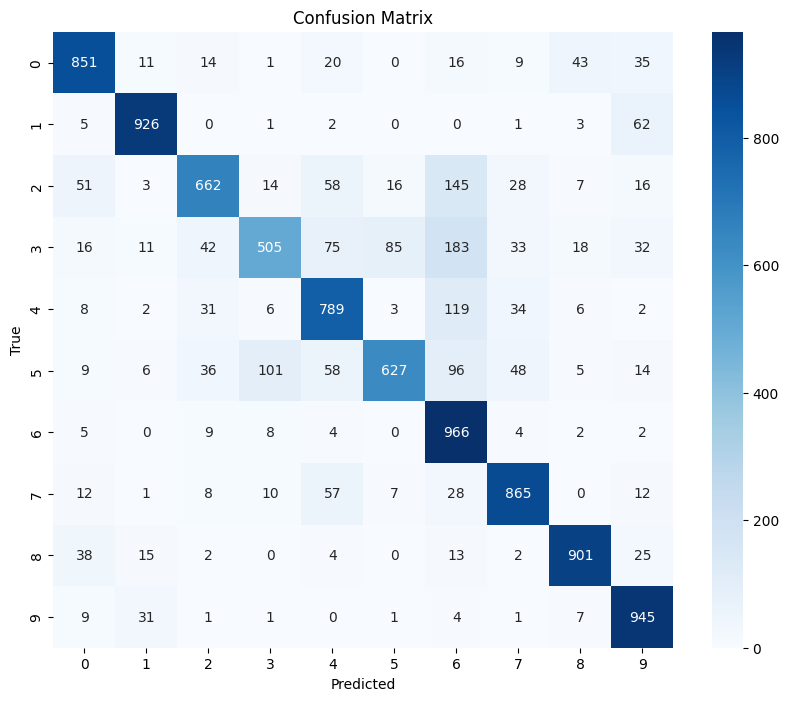

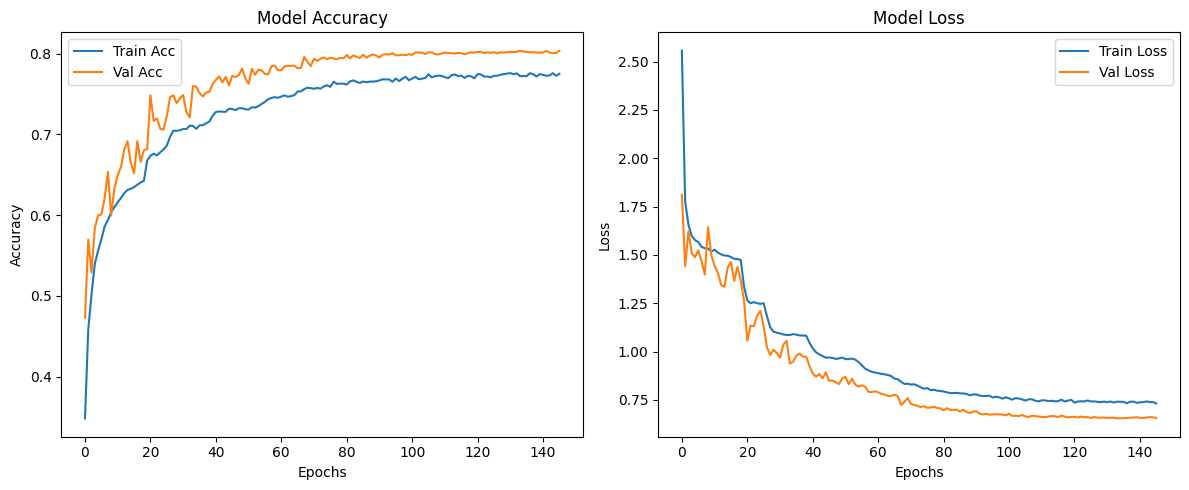

In [ ]:

# ✅ Augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    zoom_range=0.15,
    horizontal_flip=True
)
datagen.fit(X_train)

# ✅ Callbacks
callbacks = [
    EarlyStopping(patience=12, restore_best_weights=True),
    ModelCheckpoint('best_cnn_model.h5', save_best_only=True),
    ReduceLROnPlateau(monitor='val_accuracy', factor=0.5, patience=5, verbose=1)
]

# ✅ Train Model
history = cnn_model.fit(datagen.flow(X_train, y_train, batch_size=64),
                        epochs=150,
                        validation_data=(X_test, y_test),
                        callbacks=callbacks)

# ✅ Final Evaluation
test_loss, test_acc = cnn_model.evaluate(X_test, y_test)
print(f"\n🎯 Final Test Accuracy: {test_acc*100:.2f}%")

# ✅ Prediction + Classification Report
y_pred = np.argmax(cnn_model.predict(X_test), axis=1)

print("\n📊 Classification Report:\n")
print(classification_report(y_test, y_pred))

# ✅ Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ✅ Training Accuracy/Loss Plots
def plot_training_curves(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Acc')
    plt.plot(history.history['val_accuracy'], label='Val Acc')
    plt.title("Model Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title("Model Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_curves(history)
